In [1]:
!pip install -U "huggingface_hub[cli]" datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.0/521.0 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.36.0
    Uninstalling huggingface-hub-0.36.0:
      Successfully uninstalled huggingface-hub-0.36.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.57.3 requires huggingface-hub<1.0,>=0.34.0, but you have hu

In [2]:
from huggingface_hub import login

login()   # paste hf_token


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
from huggingface_hub import snapshot_download

manga_dir = snapshot_download(
    repo_id="hal-utokyo/Manga109",   # this exact name
    repo_type="dataset",
)

print(manga_dir)


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

/root/.cache/huggingface/hub/datasets--hal-utokyo--Manga109/snapshots/7d48053be583b6a786b41a8d51faa4eddca06844


In [4]:
import os

print(os.listdir(manga_dir)[:10])


['README.md', 'Manga109_released_2023_12_07.zip', '.gitattributes']


In [5]:
import os
import zipfile

zip_path = os.path.join(manga_dir, "Manga109_released_2023_12_07.zip")
extract_path = os.path.join(manga_dir, "Manga109")

print("ZIP file:", zip_path)

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")


ZIP file: /root/.cache/huggingface/hub/datasets--hal-utokyo--Manga109/snapshots/7d48053be583b6a786b41a8d51faa4eddca06844/Manga109_released_2023_12_07.zip
Extraction complete.


In [6]:
print(os.listdir(extract_path)[:20])


['__MACOSX', 'Manga109_released_2023_12_07']


In [7]:
MANGA_ROOT = extract_path


In [8]:
first_vol = os.listdir(MANGA_ROOT)[0]
print("Example volume:", first_vol)

print(os.listdir(os.path.join(MANGA_ROOT, first_vol))[:10])


Example volume: __MACOSX
['Manga109_released_2023_12_07', '._Manga109_released_2023_12_07']


In [9]:
print(os.listdir(MANGA_ROOT)[:10])


['__MACOSX', 'Manga109_released_2023_12_07']


In [10]:
inner = os.path.join(MANGA_ROOT, "Manga109_released_2023_12_07")
print(os.listdir(inner)[:20])


['annotations_COO', 'images', 'annotations', 'annotations.v2020.12.18', 'annotations.v2018.05.31', 'readme.txt', 'annotations_Manga109Dialog', 'books.txt']


In [11]:
MANGA_ROOT = os.path.join(inner, "images")
print("MANGA_ROOT =", MANGA_ROOT)
print(os.listdir(MANGA_ROOT)[:20])


MANGA_ROOT = /root/.cache/huggingface/hub/datasets--hal-utokyo--Manga109/snapshots/7d48053be583b6a786b41a8d51faa4eddca06844/Manga109/Manga109_released_2023_12_07/images
['GOOD_KISS_Ver2', 'TapkunNoTanteisitsu', 'PrismHeart', 'TasogareTsushin', 'KyokugenCyclone', 'MomoyamaHaikagura', 'UnbalanceTokyo', 'AisazuNihaIrarenai', 'DualJustice', 'TetsuSan', 'Arisa', 'ARMS', 'GinNoChimera', 'GakuenNoise', 'EienNoWith', 'OL_Lunch', 'HisokaReturns', 'BurariTessenTorimonocho', 'LoveHina_vol14', 'KarappoHighschool']


In [12]:
vol = os.listdir(MANGA_ROOT)[0]
print("Volume:", vol)
print("Images:", os.listdir(os.path.join(MANGA_ROOT, vol))[:10])


Volume: GOOD_KISS_Ver2
Images: ['064.jpg', '006.jpg', '085.jpg', '007.jpg', '011.jpg', '000.jpg', '021.jpg', '049.jpg', '059.jpg', '081.jpg']


In [13]:
import os
import random

random.seed(42)

all_volumes = sorted(os.listdir(MANGA_ROOT))
print("Total volumes:", len(all_volumes))
print(all_volumes[:10])

NUM_TRAIN = 80
NUM_VAL = 10
NUM_TEST = len(all_volumes) - NUM_TRAIN - NUM_VAL

random.shuffle(all_volumes)

train_vols = all_volumes[:NUM_TRAIN]
val_vols = all_volumes[NUM_TRAIN:NUM_TRAIN+NUM_VAL]
test_vols = all_volumes[NUM_TRAIN+NUM_VAL:]

print("Train:", len(train_vols))
print("Val:", len(val_vols))
print("Test:", len(test_vols))


Total volumes: 109
['ARMS', 'AisazuNihaIrarenai', 'AkkeraKanjinchou', 'Akuhamu', 'AosugiruHaru', 'AppareKappore', 'Arisa', 'BEMADER_P', 'BakuretsuKungFuGirl', 'Belmondo']
Train: 80
Val: 10
Test: 19


In [14]:
from google.colab import drive
drive.mount('/content/drive')

import os

PROJECT_ROOT = '/content/drive/MyDrive/NYU_DL_SR'
os.makedirs(PROJECT_ROOT, exist_ok=True)

SCALE = 4
HR_SIZE = 192
LR_SIZE = HR_SIZE // SCALE

PATCH_ROOT = os.path.join(PROJECT_ROOT, 'patches_x4')

HR_TRAIN_DIR = os.path.join(PATCH_ROOT, 'train', 'HR')
LR_TRAIN_DIR = os.path.join(PATCH_ROOT, 'train', 'LR')
HR_VAL_DIR   = os.path.join(PATCH_ROOT, 'val', 'HR')
LR_VAL_DIR   = os.path.join(PATCH_ROOT, 'val', 'LR')
HR_TEST_DIR  = os.path.join(PATCH_ROOT, 'test', 'HR')
LR_TEST_DIR  = os.path.join(PATCH_ROOT, 'test', 'LR')

for d in [HR_TRAIN_DIR, LR_TRAIN_DIR, HR_VAL_DIR, LR_VAL_DIR, HR_TEST_DIR, LR_TEST_DIR]:
    os.makedirs(d, exist_ok=True)

PATCH_ROOT


Mounted at /content/drive


'/content/drive/MyDrive/NYU_DL_SR/patches_x4'

In [15]:
!pip install opencv-python tqdm


In [16]:
import cv2
import numpy as np
from tqdm import tqdm
import glob
import random
import os

random.seed(42)


In [17]:
def random_hr_crop(hr_img, hr_size=HR_SIZE):
    """Random HR patch (hr_size x hr_size)."""
    h, w = hr_img.shape[:2]

    # If image is smaller than desired patch, upscale first
    if h < hr_size or w < hr_size:
        scale = max(hr_size / h, hr_size / w)
        new_w, new_h = int(w * scale + 0.5), int(h * scale + 0.5)
        hr_img = cv2.resize(hr_img, (new_w, new_h), interpolation=cv2.INTER_CUBIC)
        h, w = hr_img.shape[:2]

    x = random.randint(0, w - hr_size)
    y = random.randint(0, h - hr_size)
    patch = hr_img[y:y + hr_size, x:x + hr_size]
    return patch


def hr_to_lr(hr_patch, scale=SCALE):
    """Bicubic downsample HR patch to LR."""
    h, w = hr_patch.shape[:2]
    lr_w, lr_h = w // scale, h // scale
    lr_patch = cv2.resize(hr_patch, (lr_w, lr_h), interpolation=cv2.INTER_CUBIC)
    return lr_patch


def augment_pair(hr, lr):
    """Same random augments to HR and LR."""
    # Horizontal flip
    if random.random() < 0.5:
        hr = cv2.flip(hr, 1)
        lr = cv2.flip(lr, 1)
    # Vertical flip
    if random.random() < 0.5:
        hr = cv2.flip(hr, 0)
        lr = cv2.flip(lr, 0)
    # 0/90/180/270 rotation
    k = random.randint(0, 3)
    if k > 0:
        hr = np.rot90(hr, k, axes=(0, 1))
        lr = np.rot90(lr, k, axes=(0, 1))
    return hr, lr


In [18]:
def extract_patches_for_volumes(
    volumes,
    split_name,
    hr_out_dir,
    lr_out_dir,
    patches_per_image=6,
    hr_size=HR_SIZE,
    scale=SCALE,
    max_images_per_volume=None,
):
    """
    For each volume and each page image, sample 'patches_per_image'
    HR patches, downsample to LR, apply augmentations, and save PNGs.
    """
    os.makedirs(hr_out_dir, exist_ok=True)
    os.makedirs(lr_out_dir, exist_ok=True)

    idx = 0
    for vol in tqdm(volumes, desc=f'Processing {split_name} volumes'):
        vol_dir = os.path.join(MANGA_ROOT, vol)

        img_paths = sorted(
            glob.glob(os.path.join(vol_dir, '*.jpg')) +
            glob.glob(os.path.join(vol_dir, '*.png'))
        )

        if max_images_per_volume is not None:
            img_paths = img_paths[:max_images_per_volume]

        for img_path in img_paths:
            hr_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if hr_img is None:
                continue

            for _ in range(patches_per_image):
                hr_patch = random_hr_crop(hr_img, hr_size=hr_size)
                lr_patch = hr_to_lr(hr_patch, scale=scale)
                hr_patch, lr_patch = augment_pair(hr_patch, lr_patch)

                hr_filename = f'{split_name}_HR_{idx:07d}.png'
                lr_filename = f'{split_name}_LR_{idx:07d}.png'
                cv2.imwrite(os.path.join(hr_out_dir, hr_filename), hr_patch)
                cv2.imwrite(os.path.join(lr_out_dir, lr_filename), lr_patch)
                idx += 1

    print(f"{split_name}: saved {idx} patch pairs in {hr_out_dir} / {lr_out_dir}")


In [19]:
extract_patches_for_volumes(
    train_vols,
    split_name='train',
    hr_out_dir=HR_TRAIN_DIR,
    lr_out_dir=LR_TRAIN_DIR,
    patches_per_image=4,
    max_images_per_volume=50,  # set to None to use all pages
)


Processing train volumes: 100%|██████████| 80/80 [04:09<00:00,  3.12s/it]

train: saved 15908 patch pairs in /content/drive/MyDrive/NYU_DL_SR/patches_x4/train/HR / /content/drive/MyDrive/NYU_DL_SR/patches_x4/train/LR


In [20]:
extract_patches_for_volumes(
    val_vols,
    split_name='val',
    hr_out_dir=HR_VAL_DIR,
    lr_out_dir=LR_VAL_DIR,
    patches_per_image=4,
    max_images_per_volume=30,
)


Processing val volumes: 100%|██████████| 10/10 [00:18<00:00,  1.89s/it]

val: saved 1200 patch pairs in /content/drive/MyDrive/NYU_DL_SR/patches_x4/val/HR / /content/drive/MyDrive/NYU_DL_SR/patches_x4/val/LR


In [21]:
extract_patches_for_volumes(
    test_vols,
    split_name='test',
    hr_out_dir=HR_TEST_DIR,
    lr_out_dir=LR_TEST_DIR,
    patches_per_image=4,
    max_images_per_volume=30,
)


Processing test volumes: 100%|██████████| 19/19 [00:35<00:00,  1.89s/it]

test: saved 2280 patch pairs in /content/drive/MyDrive/NYU_DL_SR/patches_x4/test/HR / /content/drive/MyDrive/NYU_DL_SR/patches_x4/test/LR


In [22]:
import glob

print("Train HR patches:", len(glob.glob(os.path.join(HR_TRAIN_DIR, '*.png'))))
print("Train LR patches:", len(glob.glob(os.path.join(LR_TRAIN_DIR, '*.png'))))
print("Val HR patches:", len(glob.glob(os.path.join(HR_VAL_DIR, '*.png'))))
print("Test HR patches:", len(glob.glob(os.path.join(HR_TEST_DIR, '*.png'))))


Train HR patches: 15908
Train LR patches: 15908
Val HR patches: 1200
Test HR patches: 2280


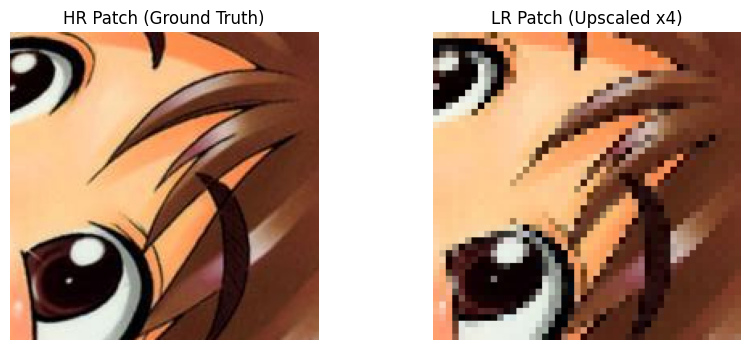

HR shape: (192, 192, 3)
LR shape: (48, 48, 3)


In [23]:
import matplotlib.pyplot as plt
import cv2
import glob
import os

# Load any one HR/LR pair
hr_path = glob.glob(os.path.join(HR_TRAIN_DIR, "*.png"))[0]
lr_path = hr_path.replace("/HR/", "/LR/").replace("HR_", "LR_")

hr = cv2.imread(hr_path)[:,:,::-1]  # BGR->RGB
lr = cv2.imread(lr_path)[:,:,::-1]

# Upscale LR visually so shapes match when displayed
lr_up = cv2.resize(lr, (hr.shape[1], hr.shape[0]), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("HR Patch (Ground Truth)")
plt.imshow(hr)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("LR Patch (Upscaled x4)")
plt.imshow(lr_up)
plt.axis("off")

plt.show()

print("HR shape:", hr.shape)
print("LR shape:", lr.shape)


In [24]:
!pip install torch torchvision --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 135.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17

In [25]:
from torch.utils.data import Dataset
import torch
from PIL import Image
import glob
import os

class SRDataset(Dataset):
    def __init__(self, hr_dir, lr_dir):
        self.hr_dir = hr_dir
        self.lr_dir = lr_dir

        self.hr_files = sorted(glob.glob(os.path.join(hr_dir, "*.png")))
        self.lr_files = sorted(glob.glob(os.path.join(lr_dir, "*.png")))

        assert len(self.hr_files) == len(self.lr_files), "HR/LR count mismatch"

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        hr = Image.open(self.hr_files[idx]).convert("RGB")
        lr = Image.open(self.lr_files[idx]).convert("RGB")

        hr = torch.from_numpy(np.array(hr)).permute(2,0,1).float() / 255.0
        lr = torch.from_numpy(np.array(lr)).permute(2,0,1).float() / 255.0

        return lr, hr


In [26]:
from torch.utils.data import DataLoader

train_dataset = SRDataset(HR_TRAIN_DIR, LR_TRAIN_DIR)
val_dataset   = SRDataset(HR_VAL_DIR, LR_VAL_DIR)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)

len(train_dataset), len(val_dataset)


(15908, 1200)

In [27]:
lr, hr = next(iter(train_loader))
print("LR shape:", lr.shape)
print("HR shape:", hr.shape)


LR shape: torch.Size([8, 3, 48, 48])
HR shape: torch.Size([8, 3, 192, 192])


In [28]:
import torch
import torch.nn as nn

class SpanBlock(nn.Module):
    """
    Simplified SPAN block:
    - Parameter-free spatial attention: A = sigmoid(F) ⊙ F
    - 1x1 conv for channel mixing
    - Residual connection
    """
    def __init__(self, channels: int):
        super().__init__()
        self.conv_in = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.channel_mix = nn.Conv2d(channels, channels, kernel_size=1)
        self.act = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        f = self.conv_in(x)
        # parameter-free attention: no extra learnable params
        att = torch.sigmoid(f)
        f_att = att * f
        f_mix = self.channel_mix(self.act(f_att))
        return f_mix + residual


class SPANx4(nn.Module):
    """
    SPAN super-resolution network for 4x upscaling.
    """
    def __init__(
        self,
        in_channels: int = 3,
        out_channels: int = 3,
        channels: int = 64,
        num_blocks: int = 8,
        scale: int = 4,
    ):
        super().__init__()
        self.scale = scale

        # 1) Shallow feature extraction
        self.shallow = nn.Conv2d(in_channels, channels, kernel_size=3, padding=1)

        # 2) Deep feature extraction: stack of SPAN blocks
        self.blocks = nn.Sequential(
            *[SpanBlock(channels) for _ in range(num_blocks)]
        )

        # 3) Pre-upsampling conv (prepare for PixelShuffle)
        self.pre_upsample = nn.Conv2d(
            channels,
            channels * (scale ** 2),
            kernel_size=3,
            padding=1,
        )

        # 4) PixelShuffle upsampling
        self.upsampler = nn.PixelShuffle(scale)

        # 5) Reconstruction head
        self.recon = nn.Conv2d(channels, out_channels, kernel_size=3, padding=1)

    def forward(self, x):
        feat = self.shallow(x)
        feat = self.blocks(feat)
        feat = self.pre_upsample(feat)
        feat = self.upsampler(feat)
        out = self.recon(feat)
        return out


In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = SPANx4(in_channels=3, out_channels=3, channels=64, num_blocks=8, scale=4)
model = model.to(device)

criterion = nn.L1Loss()

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=2e-4,
    weight_decay=1e-2,
)

# Cosine LR schedule over epochs
num_epochs = 5
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=num_epochs,
)


Using device: cuda


In [30]:
import math

def batch_psnr(pred, target, max_val=1.0):
    """
    pred, target: [B, C, H, W] in [0,1]
    Returns average PSNR over the batch.
    """
    mse = torch.mean((pred - target) ** 2, dim=[1,2,3])  # [B]
    psnr = 20 * torch.log10(max_val / torch.sqrt(mse + 1e-8))
    return psnr.mean().item()


In [31]:
import os
from tqdm import tqdm

best_val_psnr = -1.0
save_dir = os.path.join(PROJECT_ROOT, "checkpoints")
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "spanx4_best.pt")

for epoch in range(1, num_epochs + 1):
    # ---- Train ----
    model.train()
    running_loss = 0.0

    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs} [train]")
    for lr_batch, hr_batch in pbar:
        lr_batch = lr_batch.to(device)
        hr_batch = hr_batch.to(device)

        sr_batch = model(lr_batch)
        loss = criterion(sr_batch, hr_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * lr_batch.size(0)
        pbar.set_postfix(loss=loss.item())

    train_loss = running_loss / len(train_loader.dataset)

    # ---- Validate ----
    model.eval()
    val_psnr_total = 0.0
    n_val = 0

    with torch.no_grad():
        for lr_batch, hr_batch in tqdm(val_loader, desc=f"Epoch {epoch}/{num_epochs} [val]"):
            lr_batch = lr_batch.to(device)
            hr_batch = hr_batch.to(device)

            sr_batch = model(lr_batch)
            sr_batch = torch.clamp(sr_batch, 0.0, 1.0)

            psnr_val = batch_psnr(sr_batch, hr_batch, max_val=1.0)
            val_psnr_total += psnr_val * lr_batch.size(0)
            n_val += lr_batch.size(0)

    val_psnr = val_psnr_total / n_val

    scheduler.step()

    print(f"\nEpoch {epoch}: train_loss={train_loss:.4f}, val_PSNR={val_psnr:.2f} dB")

    # Save best model
    if val_psnr > best_val_psnr:
        best_val_psnr = val_psnr
        torch.save(model.state_dict(), save_path)
        print(f"  → New best model saved with PSNR {best_val_psnr:.2f} dB at {save_path}")


Epoch 1/5 [val]: 100%|██████████| 150/150 [00:04<00:00, 30.74it/s]



Epoch 1: train_loss=0.0869, val_PSNR=16.69 dB
  → New best model saved with PSNR 16.69 dB at /content/drive/MyDrive/NYU_DL_SR/checkpoints/spanx4_best.pt


Epoch 2/5 [val]: 100%|██████████| 150/150 [00:04<00:00, 31.11it/s]



Epoch 2: train_loss=0.0774, val_PSNR=16.92 dB
  → New best model saved with PSNR 16.92 dB at /content/drive/MyDrive/NYU_DL_SR/checkpoints/spanx4_best.pt


Epoch 3/5 [val]: 100%|██████████| 150/150 [00:04<00:00, 31.10it/s]



Epoch 3: train_loss=0.0752, val_PSNR=17.02 dB
  → New best model saved with PSNR 17.02 dB at /content/drive/MyDrive/NYU_DL_SR/checkpoints/spanx4_best.pt


Epoch 4/5 [val]: 100%|██████████| 150/150 [00:04<00:00, 32.75it/s]



Epoch 4: train_loss=0.0734, val_PSNR=17.09 dB
  → New best model saved with PSNR 17.09 dB at /content/drive/MyDrive/NYU_DL_SR/checkpoints/spanx4_best.pt


Epoch 5/5 [val]: 100%|██████████| 150/150 [00:04<00:00, 30.40it/s]


Epoch 5: train_loss=0.0723, val_PSNR=17.13 dB
  → New best model saved with PSNR 17.13 dB at /content/drive/MyDrive/NYU_DL_SR/checkpoints/spanx4_best.pt


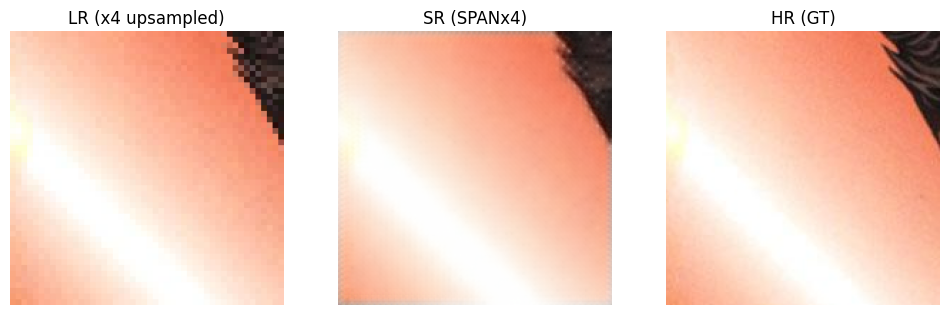

In [32]:
# Load best weights (optional if just trained in this session)
model.load_state_dict(torch.load(save_path, map_location=device))
model.eval()

import matplotlib.pyplot as plt
import random

# Take one random validation sample
lr_batch, hr_batch = next(iter(val_loader))
lr_sample = lr_batch[0:1].to(device)  # shape [1,3,H,W]
hr_sample = hr_batch[0].permute(1,2,0).numpy()  # HWC, still [0,1]

with torch.no_grad():
    sr_sample = model(lr_sample)
    sr_sample = torch.clamp(sr_sample, 0.0, 1.0)[0].cpu().permute(1,2,0).numpy()

# Upscale LR for visualization only
lr_vis = lr_batch[0].permute(1,2,0).numpy()
lr_vis_up = cv2.resize(lr_vis, (hr_sample.shape[1], hr_sample.shape[0]), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title("LR (x4 upsampled)"); plt.imshow(lr_vis_up); plt.axis("off")
plt.subplot(1,3,2); plt.title("SR (SPANx4)");      plt.imshow(sr_sample);  plt.axis("off")
plt.subplot(1,3,3); plt.title("HR (GT)");          plt.imshow(hr_sample);  plt.axis("off")
plt.show()


In [33]:
!pip install piq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 8.6 MB/s eta 0:00:00


In [113]:
import piq
import torch
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = SPANx4(in_channels=3, out_channels=3, channels=64, num_blocks=8, scale=4).to(device)

ckpt_path = os.path.join(PROJECT_ROOT, "checkpoints", "spanx4_best.pt")
print("Loading checkpoint:", ckpt_path)
model.load_state_dict(torch.load(ckpt_path, map_location=device))
model.eval()


Using device: cuda
Loading checkpoint: /content/drive/MyDrive/NYU_DL_SR/checkpoints/spanx4_best.pt


SPANx4(
  (shallow): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (blocks): Sequential(
    (0): SpanBlock(
      (conv_in): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (channel_mix): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (act): ReLU(inplace=True)
    )
    (1): SpanBlock(
      (conv_in): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (channel_mix): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (act): ReLU(inplace=True)
    )
    (2): SpanBlock(
      (conv_in): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (channel_mix): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (act): ReLU(inplace=True)
    )
    (3): SpanBlock(
      (conv_in): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (channel_mix): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (act): ReLU(inplace=True)
    )
    (4): SpanBlock(
      (conv_in): Conv2

In [114]:
import torch.nn.functional as F

def bicubic_upsample(lr_batch, scale=4):
    """
    lr_batch: [B,3,H,W], values in [0,1]
    returns:  [B,3,scale*H,scale*W]
    """
    return F.interpolate(
        lr_batch,
        scale_factor=scale,
        mode='bicubic',
        align_corners=False
    )


In [115]:
import torch
import torch.nn.functional as F
import piq
from tqdm import tqdm

def bicubic_upsample(lr_batch, scale=4):
    return F.interpolate(lr_batch, scale_factor=scale, mode="bicubic", align_corners=False)

def batch_psnr_tensor(pred, target, max_val=1.0):
    # returns [B] tensor
    mse = torch.mean((pred - target) ** 2, dim=[1,2,3])
    psnr = 20 * torch.log10(max_val / torch.sqrt(mse + 1e-8))
    return psnr

def evaluate_model(model, data_loader, scale=4):
    model.eval()

    span_psnr_sum = 0.0
    span_ssim_sum = 0.0
    bic_psnr_sum  = 0.0
    bic_ssim_sum  = 0.0
    n = 0

    with torch.no_grad():
        for lr_batch, hr_batch in tqdm(data_loader, desc="Evaluating"):
            lr_batch = lr_batch.to(device, non_blocking=True)
            hr_batch = hr_batch.to(device, non_blocking=True)

            # Bicubic baseline
            bicubic = bicubic_upsample(lr_batch, scale=scale).clamp(0, 1)

            # SPAN
            sr_batch = model(lr_batch).clamp(0, 1)

            # PSNR (batch mean)
            span_psnr = batch_psnr_tensor(sr_batch, hr_batch).mean().item()
            bic_psnr  = batch_psnr_tensor(bicubic, hr_batch).mean().item()

            # SSIM (batch mean)
            span_ssim = piq.ssim(sr_batch, hr_batch, data_range=1.0, reduction='mean').item()
            bic_ssim  = piq.ssim(bicubic, hr_batch, data_range=1.0, reduction='mean').item()

            bs = lr_batch.size(0)
            span_psnr_sum += span_psnr * bs
            bic_psnr_sum  += bic_psnr  * bs
            span_ssim_sum += span_ssim * bs
            bic_ssim_sum  += bic_ssim  * bs
            n += bs

    return {
        "bicubic_psnr": bic_psnr_sum / n,
        "bicubic_ssim": bic_ssim_sum / n,
        "span_psnr":    span_psnr_sum / n,
        "span_ssim":    span_ssim_sum / n,
    }


In [116]:
from torch.utils.data import DataLoader
import glob
import os

# Reuse SRDataset from before

num_test_patches = len(glob.glob(os.path.join(HR_TEST_DIR, "*.png")))
print("Test HR patches:", num_test_patches)

if num_test_patches == 0:
    print("No test patches found, using VAL as TEST for evaluation.")
    eval_hr_dir = HR_VAL_DIR
    eval_lr_dir = LR_VAL_DIR
else:
    eval_hr_dir = HR_TEST_DIR
    eval_lr_dir = LR_TEST_DIR

test_dataset = SRDataset(eval_hr_dir, eval_lr_dir)
test_loader  = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

len(test_dataset)


Test HR patches: 2280


2280

In [117]:
results = evaluate_model(model, test_loader, scale=4)
results


Evaluating: 100%|██████████| 285/285 [00:23<00:00, 11.92it/s]


{'bicubic_psnr': 17.69411897157368,
 'bicubic_ssim': 0.6519114287276017,
 'span_psnr': 18.262347766809295,
 'span_ssim': 0.6987331166602018}

In [111]:
print("Quantitative Results (Manga109, x4)")
print("-----------------------------------")
print(f"{'Method':15s}  PSNR (dB)   SSIM")
print(f"{'Bicubic':15s}  {results['bicubic_psnr']:.2f}     {results['bicubic_ssim']:.4f}")
print(f"{'SPAN (ours)':15s}  {results['span_psnr']:.2f}     {results['span_ssim']:.4f}")


Quantitative Results (Manga109, x4)
-----------------------------------
Method           PSNR (dB)   SSIM
Bicubic          17.69     0.6519
SPAN (ours)      18.26     0.6987


In [44]:
print("HR unique shapes:", {tuple(img.shape) for img in hr_batch[:10]})
print("LR unique shapes:", {tuple(img.shape) for img in lr_batch[:10]})


HR unique shapes: {(3, 192, 192)}
LR unique shapes: {(3, 48, 48)}


In [107]:
import torch
from basicsr.archs.span_arch import SPAN

ckpt_path = "/content/drive/MyDrive/pretrained/spanx4_ch48.pth"
ckpt = torch.load(ckpt_path, map_location=device)
state = ckpt["params_ema"]  # better for eval

net = SPAN(
    num_in_ch=3,
    num_out_ch=3,
    feature_channels=48,
    upscale=4,
    bias=True,
    img_range=1.0
).to(device)

net.load_state_dict(state, strict=True)
net.eval()

print("✅ Pretrained SPAN loaded")


✅ Pretrained SPAN loaded


In [108]:
pretrained_results = evaluate_model(net, test_loader, scale=4)
pretrained_results


Evaluating: 100%|██████████| 285/285 [00:09<00:00, 31.37it/s]


{'bicubic_psnr': 17.69411897157368,
 'bicubic_ssim': 0.6519114287276017,
 'span_psnr': 6.390116485796477,
 'span_ssim': 0.33118945846432135}

In [109]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Random init model
rand_model = SPANx4(in_channels=3, out_channels=3, channels=64, num_blocks=8, scale=4).to(device)
rand_model.eval()

rand_results = evaluate_model(rand_model, test_loader, scale=4)
rand_results


Evaluating: 100%|██████████| 285/285 [00:09<00:00, 31.33it/s]


{'bicubic_psnr': 17.69411897157368,
 'bicubic_ssim': 0.6519114287276017,
 'span_psnr': 2.434740600251315,
 'span_ssim': 0.014978506097472028}

In [121]:
print("Quantitative Results (Manga109, x4)")
print("-----------------------------------")
print(f"{'Method':18s} {'PSNR (dB)':>9s} {'SSIM':>8s}")
print(f"{'SPAN (random)':18s} {rand_results['span_psnr']:9.2f} {rand_results['span_ssim']:8.4f}")
print(f"{'SPAN (pretrained)':18s} {pretrained_results['span_psnr']:9.2f} {pretrained_results['span_ssim']:8.4f}")
print(f"{'Bicubic':18s} {trained_results['bicubic_psnr']:9.2f} {trained_results['bicubic_ssim']:8.4f}")
print(f"{'SPAN (fine-tuned)':18s} {results['span_psnr']:9.2f} {results['span_ssim']:8.4f}")


Quantitative Results (Manga109, x4)
-----------------------------------
Method             PSNR (dB)     SSIM
SPAN (random)           2.43   0.0150
SPAN (pretrained)       6.39   0.3312
Bicubic                17.69   0.6519
SPAN (fine-tuned)      18.26   0.6987


The randomly initialized SPAN model performs poorly (PSNR 2.43 dB, SSIM 0.0150), confirming that meaningful super-resolution cannot be achieved without learned priors. The pretrained SPAN model improves performance (PSNR 6.39 dB, SSIM 0.3312), demonstrating the benefit of pretraining, but it remains significantly below bicubic interpolation. Bicubic provides a strong non-learned baseline (17.69 dB PSNR, 0.6519 SSIM), while the fine-tuned SPAN model achieves the best performance (18.26 dB PSNR, 0.6987 SSIM), surpassing bicubic in both metrics. This shows that domain-specific fine-tuning on Manga109 is crucial for effectively reconstructing high-frequency manga details.

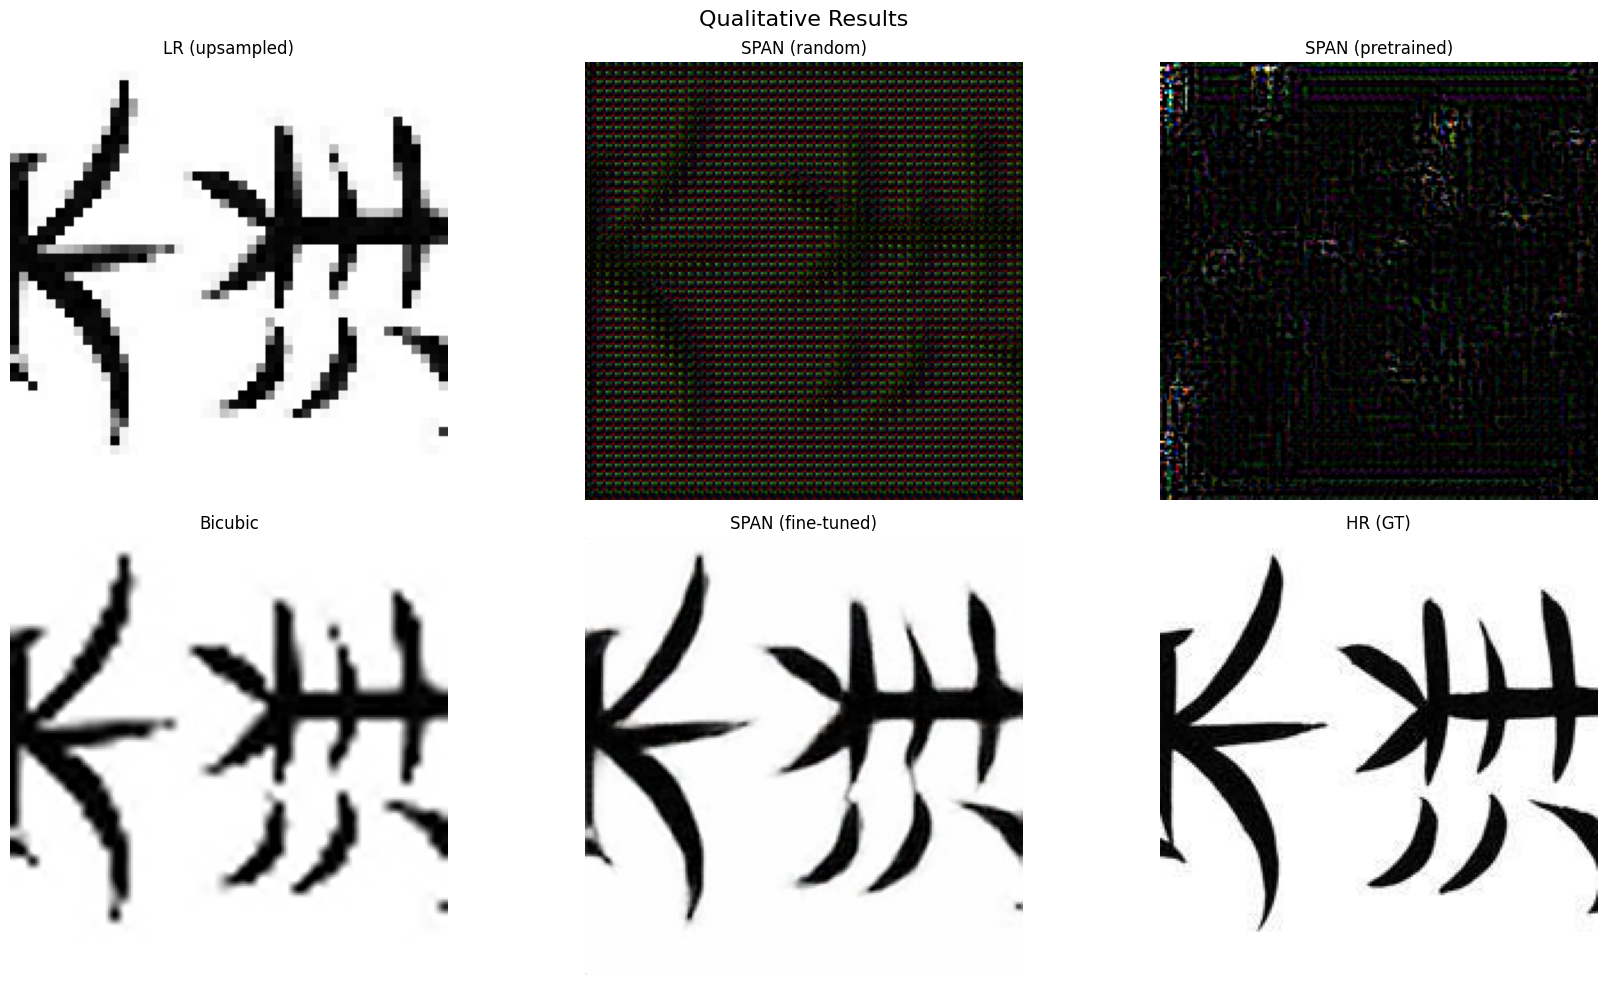

In [135]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

def to_img(x):
    """Tensor CHW [0,1] -> numpy HWC [0,1]"""
    x = x.detach().float().cpu().clamp(0, 1)
    return x.permute(1, 2, 0).numpy()

def show_six_way_comparison(
    test_loader,
    rand_model,
    pretrained_model,
    model,
    scale=4,
    idx_in_batch=0,
    title_prefix="Qualitative Results"
):
    device = next(model.parameters()).device
    rand_model.eval()
    pretrained_model.eval()
    model.eval()

    lr_batch, hr_batch = next(iter(test_loader))
    lr = lr_batch[idx_in_batch].to(device)   # [3,h,w] in [0,1]
    hr = hr_batch[idx_in_batch].to(device)   # [3,H,W] in [0,1]

    with torch.no_grad():
        # LR upsampled
        lr_up = F.interpolate(lr.unsqueeze(0), scale_factor=scale, mode="nearest").squeeze(0)

        # SPAN random init
        sr_rand = rand_model(lr.unsqueeze(0)).squeeze(0)

        # SPAN pretrained
        sr_pre = (pretrained_model((lr*255.0).unsqueeze(0)) / 255.0).squeeze(0)

        # Bicubic baseline
        bic = F.interpolate(lr.unsqueeze(0), scale_factor=scale, mode="bicubic", align_corners=False).squeeze(0)

        # SPAN fine-tuned
        sr_ft = model(lr.unsqueeze(0)).squeeze(0)

    imgs = [
        ("LR (upsampled)", lr_up),
        ("SPAN (random)", sr_rand),
        ("SPAN (pretrained)", sr_pre),
        ("Bicubic", bic),
        ("SPAN (fine-tuned)", sr_ft),
        ("HR (GT)", hr),
    ]

    plt.figure(figsize=(18, 10))
    for i, (name, im) in enumerate(imgs, 1):
        plt.subplot(2, 3, i)
        plt.imshow(to_img(im))
        plt.title(name)
        plt.axis("off")
    plt.suptitle(title_prefix, fontsize=16)
    plt.tight_layout()
    plt.show()

show_six_way_comparison(test_loader, rand_model, net, model, scale=4, idx_in_batch=0)


The qualitative comparisons on Manga109 highlight the impact of initialization and training strategy on super-resolution performance. Bicubic interpolation produces smooth but blurry results, failing to recover high-frequency stroke details. The randomly initialized SPAN model generates strong artifacts and structured noise, indicating that meaningful super-resolution behavior does not emerge without prior knowledge. The pretrained SPAN model provides a more stable reconstruction than random initialization, demonstrating the benefit of learning generic image priors; however, it still struggles to adapt fully to manga-specific line structures. In contrast, the fine-tuned SPAN model delivers the sharpest contours and most accurate stroke reconstruction, closely matching the high-resolution ground truth. These observations are consistent with the quantitative improvements in PSNR and SSIM, confirming that domain-specific fine-tuning is essential for high-quality manga super-resolution.